# CNN Using CIFAR10 Data

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

In [1]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([transforms.ToTensor(),
                                #mean for each channel RGB is 0.5, std for each channel is 0.5
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:03<00:00, 49590100.66it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
# obtain training indices that will be used for validation
batch_size=20
num_workers=0
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(0.2 * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

In [4]:
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
    num_workers=num_workers)

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizing Training Data

In [5]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter) # Use next(dataiter) instead of dataiter.next()
images = images.numpy()

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
                                 #(1,2,0) is (channels, height, width)


By transposing the image tensor in this manner, the image is reshaped from the (channels, height, width) format to the (height, width, channels) format, which is the standard format for displaying images in many libraries, including Matplotlib.

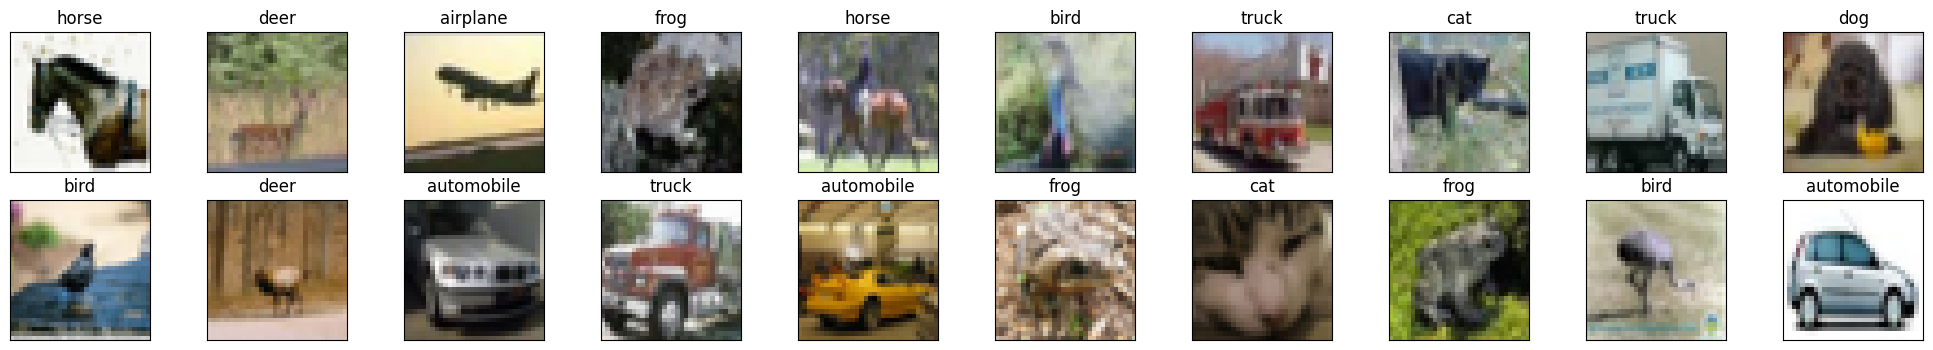

In [6]:

fig = plt.figure(figsize=(25, 4))

# Display 20 images
for idx in np.arange(20):
    # The second and third arguments should be integers
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [7]:
dataiter = iter(train_loader)
images, labels = next(dataiter)  # Use next(dataiter) to get the next batch
images[0].shape

torch.Size([3, 32, 32])

In [8]:
images.shape

torch.Size([20, 3, 32, 32])

In [9]:
images[2]

tensor([[[ 0.6078,  0.5686,  0.7647,  ...,  0.6078,  0.6471,  0.6706],
         [ 0.3098,  0.1451,  0.2941,  ..., -0.0902, -0.0510,  0.0902],
         [-0.3255, -0.3882, -0.4196,  ..., -0.5451, -0.6078, -0.5922],
         ...,
         [-0.4431, -0.4275, -0.4039,  ..., -0.3412, -0.3333, -0.3333],
         [-0.4039, -0.4039, -0.3333,  ..., -0.2706, -0.2000, -0.2863],
         [-0.4118, -0.3333, -0.3176,  ..., -0.3020, -0.2157, -0.2784]],

        [[ 0.5843,  0.5451,  0.7412,  ...,  0.5922,  0.6471,  0.6784],
         [ 0.3098,  0.1373,  0.3098,  ..., -0.0275,  0.0275,  0.1608],
         [-0.2941, -0.3569, -0.3725,  ..., -0.4431, -0.4902, -0.4745],
         ...,
         [-0.1765, -0.1608, -0.1373,  ..., -0.1059, -0.1137, -0.1216],
         [-0.1529, -0.1529, -0.0902,  ..., -0.0431,  0.0039, -0.0824],
         [-0.1294, -0.0824, -0.0510,  ..., -0.0588, -0.0353, -0.0667]],

        [[ 0.6314,  0.5843,  0.7647,  ...,  0.5608,  0.6471,  0.7020],
         [ 0.3255,  0.1373,  0.3098,  ..., -0

In [10]:
import torch.nn as nn

In [11]:
#in_channels - Number of channels in the input image
#out_channels- Number of channels produced by the convolution
#kernel_size - size of the filter
#input image size = 32x32x3
conv1 = nn.Conv2d(3, 16, 3, padding=1) #no of Feature Maps =16
pool1 = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(16,32, 3, padding=1)#no of Feature Maps =32
conv3 = nn.Conv2d(32,64, 3, padding=1)#no of Feature Maps =64

# Selecting a single Image

In [12]:
dataiter = iter(train_loader)
images, labels = next(dataiter)  # Use next(iter(dataloader))
images[0].shape

torch.Size([3, 32, 32])

# Passing a single image through Convolutional Layer 1

In [13]:
m=conv1(images[0])
m.shape

torch.Size([16, 32, 32])

# Adding a Pooling Layer

In [14]:
p1= pool1(m)
p1.shape

torch.Size([16, 16, 16])

# Passing the same image through Convolutional Layer 2

In [15]:
m2 = conv2(p1)
m2.shape

torch.Size([32, 16, 16])

# Adding Second Pooling Layer

In [16]:
p2 = pool1(m2)
p2.shape

torch.Size([32, 8, 8])

# Passing the same image through Convolutional Layer 3

In [17]:
m3 = conv3(p2)
m3.shape

torch.Size([64, 8, 8])

# Adding Third Pooling Layer

In [18]:
p3 = pool1(m3)
p3.shape

torch.Size([64, 4, 4])

In [19]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 32x32x3 image tensor)
        #We supply following inputs to the function
        #in_channels - Number of channels in the unput image
        #out_channels- Number of channels produced by the convolution
        #kernel_size - size of the filter

        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # convolutional layer (sees 4x4x64 tensor)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, 10)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        # X will go into the first convolution layer and produce 16 channel feature map
        # This feature map will be then passed through an activation function
        # Finally the feature map will pass through a 2x2 max pooling layer
        x = self.pool(F.relu(self.conv1(x)))#16x16X16
        #print("shape after cv1:", x.shape)
        # X will go into the first convolution layer and produce 32 channel image
        # This feature map will be then passed through an activation function
        # Finally the feature map will pass through a 2x2 max pooling layer
        x = self.pool(F.relu(self.conv2(x)))
        #print("shape after cv2:", x.shape)
        # X will go into the first convolution layer and produce 64 channel image
        # This feature map will be then passed through an activation function
        # Finally the feature map will pass through a 2x2 max pooling layer
        x = self.pool(F.relu(self.conv3(x)))
        #print("shape after all cv:", x.shape)
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        #print("shape after flatten:", x.shape)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        #print("shape after all l1:", x.shape)
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        #print("shape after all l2:", x.shape)
        return x

In [20]:
# create a complete CNN
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [21]:
import torch.optim as optim
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()
# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [22]:
# number of epochs to train the model
n_epochs = 10
valid_loss_min = np.Inf # track change in validation loss
for epoch in range(1, n_epochs+1):
    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # In this step we set the gradients as 0 so that they can be trained
        optimizer.zero_grad()
        '''Feed forward mechanism:
        This will send our batch of data through the network and
        # Calculate the probabilities for each image '''
        output = model(data)
        '''Once our data has been passed through the network, we get probabilities as an output
        This output is howvwer meaningless. Our model still needs to train. To understand
        where our model went worng we compute the loss.'''
        loss = criterion(output, target)
        '''Backward mechanism: Once our loss is calculated, its time to change the weights and
        optimise our network. This is the part where we back propogate our error through the network
        calculate the gradients at each point and change the weights accordingly'''
        loss.backward()
        '''The next optimizer step will allow us to change the magnitude of steps we take
        to reach the global minimum'''
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
    '''As our model is trained for the first batch, we test it immediately. This helps us understand
    if our model is actually improving with every iteration or not'''
    ######################
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss
        valid_loss += loss.item()*data.size(0)

    '''After the forward pass is done, the loss will be backpropogated through the network
    to update the weights and same process will be done for the number of epochs we will be using for training'''

    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)

    # print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 2.187646 	Validation Loss: 1.934240
Validation loss decreased (inf --> 1.934240).  Saving model ...
Epoch: 2 	Training Loss: 1.743230 	Validation Loss: 1.558324
Validation loss decreased (1.934240 --> 1.558324).  Saving model ...
Epoch: 3 	Training Loss: 1.519258 	Validation Loss: 1.388146
Validation loss decreased (1.558324 --> 1.388146).  Saving model ...
Epoch: 4 	Training Loss: 1.390259 	Validation Loss: 1.290862
Validation loss decreased (1.388146 --> 1.290862).  Saving model ...
Epoch: 5 	Training Loss: 1.282841 	Validation Loss: 1.174702
Validation loss decreased (1.290862 --> 1.174702).  Saving model ...
Epoch: 6 	Training Loss: 1.194774 	Validation Loss: 1.080087
Validation loss decreased (1.174702 --> 1.080087).  Saving model ...
Epoch: 7 	Training Loss: 1.121318 	Validation Loss: 1.029553
Validation loss decreased (1.080087 --> 1.029553).  Saving model ...
Epoch: 8 	Training Loss: 1.061755 	Validation Loss: 0.970413
Validation loss decreased (1.02955

# CIFAR 10 with Tensorflow

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Download and Prepare the CIFAR 10 Dataset

In [24]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


# Verify The Data

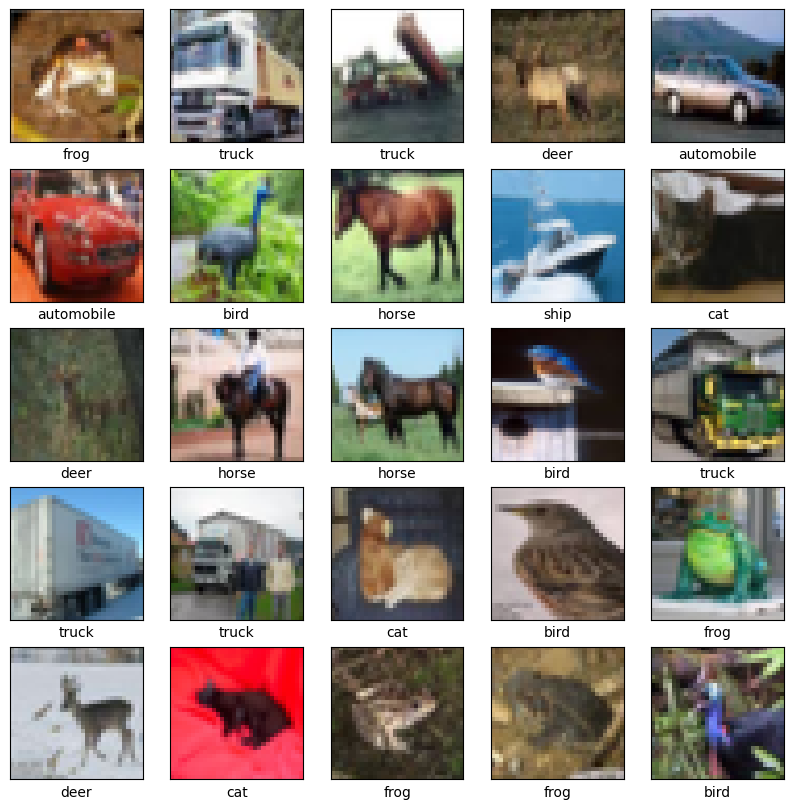

In [25]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Create The Convolutional Base

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Looking at the model Architecture

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
Total params: 23584 (92.12 KB)
Trainable params: 23584 (

Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification.

Dense layers take vectors as input (which are 1D)

Flatten (or unroll) the 3D output to 1D,

Add one or more Dense layers on top.

CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Compile and Train the Model

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.5731 - accuracy: 0.4256 - val_loss: 1.3792 - val_accuracy: 0.4938
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2193 - accuracy: 0.5653 - val_loss: 1.1323 - val_accuracy: 0.5999
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0648 - accuracy: 0.6267 - val_loss: 1.1193 - val_accuracy: 0.6083
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9643 - accuracy: 0.6624 - val_loss: 1.0366 - val_accuracy: 0.6450
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8918 - accuracy: 0.6886 - val_loss: 0.9370 - val_accuracy: 0.6765
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8330 - accuracy: 0.7093 - val_loss: 0.9277 - val_accuracy: 0.6807
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7859 - accuracy: 0.7238 - val_loss: 0.9057 - val_accuracy

# Model Evaluation

313/313 - 1s - loss: 0.9103 - accuracy: 0.6912 - 603ms/epoch - 2ms/step


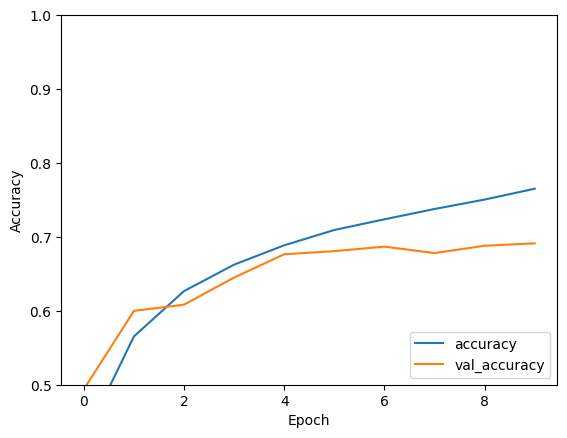

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Transfer Learning

Importing Libraries

In [32]:
import keras
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

Importing Data

In [33]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [34]:
print((train_images.shape,train_labels.shape))
#print((x_val.shape,y_val.shape))
print((test_images.shape,test_labels.shape))

((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))


# Converting Lables to Categorical

In [35]:
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

In [36]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Importing VGG19 Model, Changing Input Size, Passing the Shape of Classes

In [37]:
model_1 = VGG19(include_top=False,
                     weights='imagenet',
                     input_shape=(32,32,3),classes=y_train.shape[1])

80134624/80134624 [==============================] - 0s 0us/step


In [38]:
model_1.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

# Adding Custom Hiddin Layers and Output Layer for our Application (CIFAR 10)

In [39]:
from tensorflow.keras import layers, Model

# Assuming 'model_1' is your VGG19 base model
x = model_1.output  # Start with the output of the VGG19 model

x = layers.Dense(1024, activation='relu')(x)  # Connect the dense layer to the VGG19 output
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(.3)(x)  # Uncomment if you want to add dropout
x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(.2)(x)  # Uncomment if you want to add dropout
predictions = layers.Dense(10, activation='softmax')(x)  # Final classification layer

# Create a new model with the VGG19 base and your added layers
model_1 = Model(inputs=model_1.input, outputs=predictions)

# Compile Model

In [40]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_1.fit(train_images, train_labels, epochs=1,
                    validation_data=(test_images, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 77s 43ms/step - loss: 2.3060 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.0999


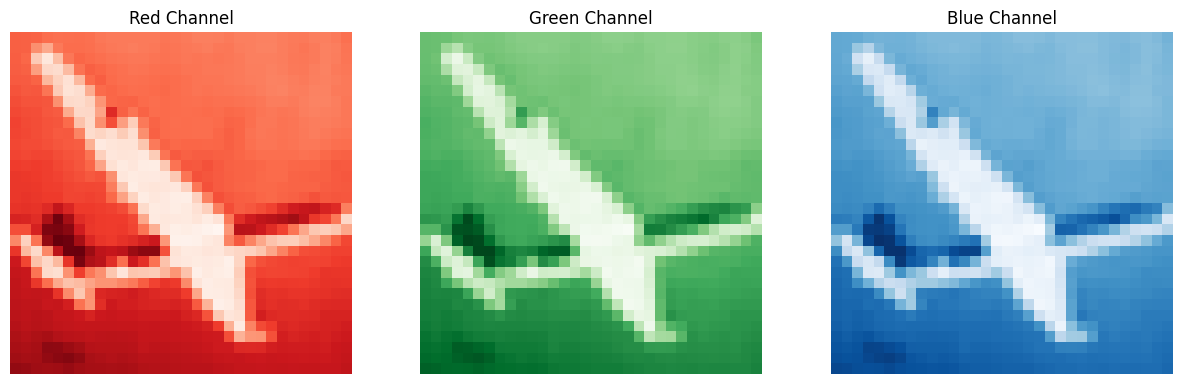

In [41]:
import matplotlib.pyplot as plt

# Assuming images is a batch of images from CIFAR10 dataset and is in the shape (batch_size, 3, height, width)
# Get the first image from the batch
img = images[0]

# PyTorch uses the channel-first format, so we need to change it to channel-last format
# This can be done using the permute method
img = img.permute(1, 2, 0)

# Now, img is in the shape (height, width, 3)
# Extracting the Red, Green, and Blue channels
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

# Plotting each channel separately
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Red channel
axs[0].imshow(R, cmap='Reds')
axs[0].set_title('Red Channel')
axs[0].axis('off')  # Turn off axis

# Plot Green channel
axs[1].imshow(G, cmap='Greens')
axs[1].set_title('Green Channel')
axs[1].axis('off')  # Turn off axis

# Plot Blue channel
axs[2].imshow(B, cmap='Blues')
axs[2].set_title('Blue Channel')
axs[2].axis('off')  # Turn off axis

plt.show()